## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings('ignore')

## Import Dataset

In [2]:
train = pd.read_csv('train_BRCpofr.csv') #training data
train

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736
...,...,...,...,...,...,...,...,...,...,...,...,...
89387,89388,Male,Rural,High School,More than 10L,0,6,0,More than 1,B,Platinum,95736
89388,89389,Male,Urban,Bachelor,5L-10L,1,0,3897,More than 1,A,Platinum,67596
89389,89390,Female,Urban,Bachelor,5L-10L,0,4,3363,More than 1,B,Platinum,114120
89390,89391,Female,Rural,High School,2L-5L,0,8,0,More than 1,B,Platinum,71772


In [3]:
test = pd.read_csv('test_koRSKBP.csv') #testing data
test

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,89393,Female,Rural,High School,5L-10L,0,6,2134,More than 1,B,Silver
1,89394,Female,Urban,High School,2L-5L,0,4,4102,More than 1,A,Platinum
2,89395,Male,Rural,High School,5L-10L,1,7,2925,More than 1,B,Gold
3,89396,Female,Rural,Bachelor,More than 10L,1,2,0,More than 1,B,Silver
4,89397,Female,Urban,High School,2L-5L,0,5,14059,More than 1,B,Silver
...,...,...,...,...,...,...,...,...,...,...,...
59590,148983,Male,Rural,Bachelor,5L-10L,1,6,0,1,A,Silver
59591,148984,Male,Urban,High School,5L-10L,0,6,0,1,C,Gold
59592,148985,Female,Urban,High School,2L-5L,1,4,3323,More than 1,B,Platinum
59593,148986,Male,Rural,Bachelor,5L-10L,0,1,2886,More than 1,A,Silver


In [4]:
#store the length
train_len = len(train)
test_len = len(test)

In [5]:
#concatenate both dataframes
df = pd.concat([train,test],axis=0)
df.reset_index(drop=True,inplace=True)
df.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308.0
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400.0
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212.0
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920.0
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736.0


In [6]:
df.tail()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
148982,148983,Male,Rural,Bachelor,5L-10L,1,6,0,1,A,Silver,NaN
148983,148984,Male,Urban,High School,5L-10L,0,6,0,1,C,Gold,NaN
148984,148985,Female,Urban,High School,2L-5L,1,4,3323,More than 1,B,Platinum,NaN
148985,148986,Male,Rural,Bachelor,5L-10L,0,1,2886,More than 1,A,Silver,NaN
148986,148987,Female,Urban,Bachelor,5L-10L,1,4,5939,More than 1,B,Platinum,NaN


In [7]:
print(len(train),len(test),len(df))

89392 59595 148987


## Data Understanding

In [8]:
df.info() #summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148987 entries, 0 to 148986
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              148987 non-null  int64  
 1   gender          148987 non-null  object 
 2   area            148987 non-null  object 
 3   qualification   148987 non-null  object 
 4   income          148987 non-null  object 
 5   marital_status  148987 non-null  int64  
 6   vintage         148987 non-null  int64  
 7   claim_amount    148987 non-null  int64  
 8   num_policies    148987 non-null  object 
 9   policy          148987 non-null  object 
 10  type_of_policy  148987 non-null  object 
 11  cltv            89392 non-null   float64
dtypes: float64(1), int64(4), object(7)
memory usage: 13.6+ MB


In [9]:
df.dtypes #returns the datatype of each column

id                  int64
gender             object
area               object
qualification      object
income             object
marital_status      int64
vintage             int64
claim_amount        int64
num_policies       object
policy             object
type_of_policy     object
cltv              float64
dtype: object

In [10]:
df.isna().sum() #to check if the dataset contains any null or missing values

id                    0
gender                0
area                  0
qualification         0
income                0
marital_status        0
vintage               0
claim_amount          0
num_policies          0
policy                0
type_of_policy        0
cltv              59595
dtype: int64

In [11]:
df.shape #to find the number of rows and columns

(148987, 12)

In [12]:
df.describe(include='all') #to get the complete descriptive statistics.

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
count,148987.000000,148987,148987,148987,148987,148987.000000,148987.000000,148987.000000,148987,148987,148987,89392.000000
unique,NaN,2,2,3,4,NaN,NaN,NaN,2,3,3,NaN
top,NaN,Male,Urban,High School,5L-10L,NaN,NaN,NaN,More than 1,A,Platinum,NaN
freq,NaN,84138,103896,77082,87804,NaN,NaN,NaN,100571,94515,79704,NaN
mean,74494.000000,NaN,NaN,NaN,NaN,0.576064,4.605523,4358.303201,NaN,NaN,NaN,97952.828978
std,43008.986615,NaN,NaN,NaN,NaN,0.494182,2.287299,3272.692800,NaN,NaN,NaN,90613.814793
min,1.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,24828.000000
25%,37247.500000,NaN,NaN,NaN,NaN,0.000000,3.000000,2402.000000,NaN,NaN,NaN,52836.000000
50%,74494.000000,NaN,NaN,NaN,NaN,1.000000,5.000000,4095.000000,NaN,NaN,NaN,66396.000000
75%,111740.500000,NaN,NaN,NaN,NaN,1.000000,6.000000,6098.000000,NaN,NaN,NaN,103440.000000


In [13]:
df.columns #returns all of the column labels of the given dataframe.

Index(['id', 'gender', 'area', 'qualification', 'income', 'marital_status',
       'vintage', 'claim_amount', 'num_policies', 'policy', 'type_of_policy',
       'cltv'],
      dtype='object')

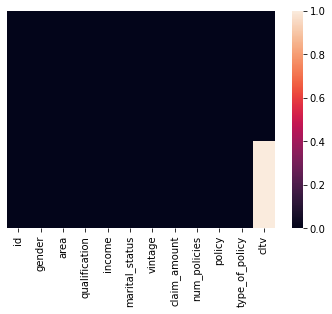

In [14]:
sns.heatmap(df.isna(),yticklabels=False,cbar=True) #heatmap to identify the features having null values.
plt.show()

### Checking Outliers 

<AxesSubplot:>

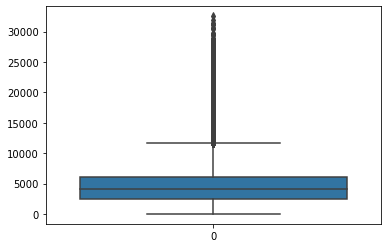

In [15]:
sns.boxplot(data=df['claim_amount']) #boxplot to check the outliers

### Removing Outliers

In [16]:
#using iqr method to determine outliers
def outliers(df,claim_amount):
    q1=df[claim_amount].quantile(0.25)
    q3=df[claim_amount].quantile(0.75)
    iqr=q3-q1
    lower_limit=q1-1.5*(iqr)
    upper_limit=q1+1.5*(iqr)
    df[claim_amount]=np.where(df[claim_amount]>upper_limit,upper_limit,df[claim_amount])
    df[claim_amount]=np.where(df[claim_amount]<lower_limit,upper_limit,df[claim_amount])

<AxesSubplot:>

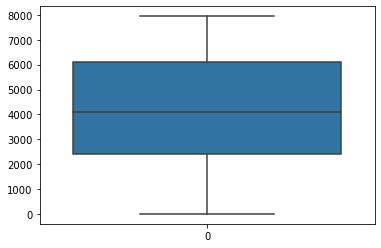

In [17]:
outliers(df,'claim_amount')
sns.boxplot(data=df['claim_amount'])

## Exploratory Data Analysis

In [18]:
#unique values of all the features
print('Gender:',df['gender'].unique())
print('Area:',df['area'].unique())
print('Qualification:',df['qualification'].unique())
print('Income:',df['income'].unique())
print('Marital_status:',df['marital_status'].unique())
print('Vintage:',df['vintage'].unique())
print('Num_policies:',df['num_policies'].unique())
print('Policy:',df['policy'].unique())
print('Type_of_policy:',df['type_of_policy'].unique())

Gender: ['Male' 'Female']
Area: ['Urban' 'Rural']
Qualification: ['Bachelor' 'High School' 'Others']
Income: ['5L-10L' 'More than 10L' '2L-5L' '<=2L']
Marital_status: [1 0]
Vintage: [5 8 7 6 1 0 3 4 2]
Num_policies: ['More than 1' '1']
Policy: ['A' 'C' 'B']
Type_of_policy: ['Platinum' 'Gold' 'Silver']


In [19]:
df['income']=df['income'].map({'<=2L':0,'2L-5L':1,'5L-10L':2,'More than 10L':3})

In [20]:
df['income'].unique()

array([2, 3, 1, 0], dtype=int64)

In [21]:
df['num_policies']=df['num_policies'].map({'1':0,'More than 1':1})

In [22]:
df['num_policies'].unique()

array([1, 0], dtype=int64)

In [23]:
df

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,2,1,5,5790.0,1,A,Platinum,64308.0
1,2,Male,Rural,High School,2,0,8,5080.0,1,A,Platinum,515400.0
2,3,Male,Urban,Bachelor,2,1,8,2599.0,1,A,Platinum,64212.0
3,4,Female,Rural,High School,2,0,7,0.0,1,A,Platinum,97920.0
4,5,Male,Urban,High School,3,1,6,3508.0,1,A,Gold,59736.0
...,...,...,...,...,...,...,...,...,...,...,...,...
148982,148983,Male,Rural,Bachelor,2,1,6,0.0,0,A,Silver,NaN
148983,148984,Male,Urban,High School,2,0,6,0.0,0,C,Gold,NaN
148984,148985,Female,Urban,High School,1,1,4,3323.0,1,B,Platinum,NaN
148985,148986,Male,Rural,Bachelor,2,0,1,2886.0,1,A,Silver,NaN


## Data Transformation

In [24]:
#using labelEncoder to transform the non numerical labels to numerical labels.
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['area'] = le.fit_transform(df['area'])
df['qualification'] = le.fit_transform(df['qualification'])
df['policy'] = le.fit_transform(df['policy'])
df['type_of_policy'] = le.fit_transform(df['type_of_policy'])
df

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,1,1,0,2,1,5,5790.0,1,0,1,64308.0
1,2,1,0,1,2,0,8,5080.0,1,0,1,515400.0
2,3,1,1,0,2,1,8,2599.0,1,0,1,64212.0
3,4,0,0,1,2,0,7,0.0,1,0,1,97920.0
4,5,1,1,1,3,1,6,3508.0,1,0,0,59736.0
...,...,...,...,...,...,...,...,...,...,...,...,...
148982,148983,1,0,0,2,1,6,0.0,0,0,2,NaN
148983,148984,1,1,1,2,0,6,0.0,0,2,0,NaN
148984,148985,0,1,1,1,1,4,3323.0,1,1,1,NaN
148985,148986,1,0,0,2,0,1,2886.0,1,0,2,NaN


## Data Visualization

<AxesSubplot:xlabel='gender', ylabel='income'>

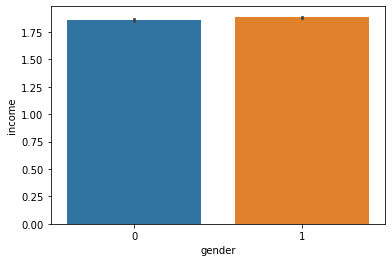

In [25]:
sns.barplot('gender','income',data=df)

<AxesSubplot:xlabel='gender', ylabel='claim_amount'>

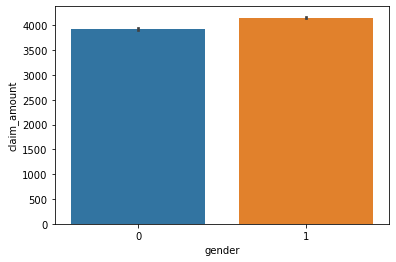

In [26]:
sns.barplot('gender','claim_amount',data=df)

<AxesSubplot:xlabel='qualification', ylabel='num_policies'>

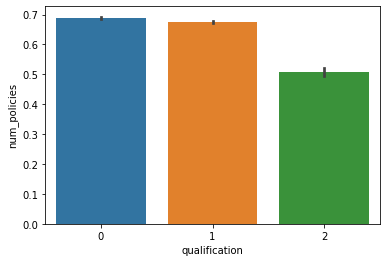

In [27]:
sns.barplot('qualification','num_policies',data=df)

<AxesSubplot:xlabel='type_of_policy', ylabel='marital_status'>

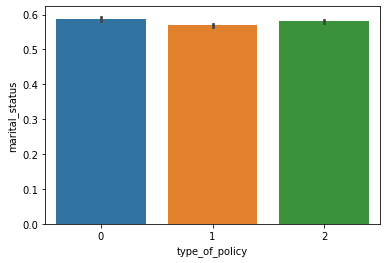

In [28]:
sns.barplot('type_of_policy','marital_status',data=df)

## Input Split

In [29]:
train = df.iloc[:train_len,:]
test = df.iloc[train_len:,:]

In [30]:
train

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,1,1,0,2,1,5,5790.0,1,0,1,64308.0
1,2,1,0,1,2,0,8,5080.0,1,0,1,515400.0
2,3,1,1,0,2,1,8,2599.0,1,0,1,64212.0
3,4,0,0,1,2,0,7,0.0,1,0,1,97920.0
4,5,1,1,1,3,1,6,3508.0,1,0,0,59736.0
...,...,...,...,...,...,...,...,...,...,...,...,...
89387,89388,1,0,1,3,0,6,0.0,1,1,1,95736.0
89388,89389,1,1,0,2,1,0,3897.0,1,0,1,67596.0
89389,89390,0,1,0,2,0,4,3363.0,1,1,1,114120.0
89390,89391,0,0,1,1,0,8,0.0,1,1,1,71772.0


In [31]:
test

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
89392,89393,0,0,1,2,0,6,2134.0,1,1,2,NaN
89393,89394,0,1,1,1,0,4,4102.0,1,0,1,NaN
89394,89395,1,0,1,2,1,7,2925.0,1,1,0,NaN
89395,89396,0,0,0,3,1,2,0.0,1,1,2,NaN
89396,89397,0,1,1,1,0,5,7946.0,1,1,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
148982,148983,1,0,0,2,1,6,0.0,0,0,2,NaN
148983,148984,1,1,1,2,0,6,0.0,0,2,0,NaN
148984,148985,0,1,1,1,1,4,3323.0,1,1,1,NaN
148985,148986,1,0,0,2,0,1,2886.0,1,0,2,NaN


## Model Building

In [32]:
X = train.drop('cltv',axis=1)
y = train[['cltv']]

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=12,shuffle=True)

In [34]:
X_train.shape,y_train.shape

((71513, 11), (71513, 1))

In [35]:
X_test.shape,y_test.shape

((17879, 11), (17879, 1))

The following models will the applied on the data:
1. Linear Regression
2. Decision Tree Regressor
3. Random Forest Regressor
4. Gradient boosting Regressor
5. Lasso Regressor
6. Ridge Regressor

## Model Training 

In [36]:
linear_model = LinearRegression()
dt_model = DecisionTreeRegressor()
rf_model = RandomForestRegressor()
gb_model = GradientBoostingRegressor()
ls = Lasso(alpha=1)
ridge = Ridge(alpha=5)

### Training time analysis

In [37]:
%%time
linear_model.fit(X_train,y_train)

CPU times: total: 93.8 ms
Wall time: 176 ms


LinearRegression()

In [38]:
%%time
dt_model.fit(X_train,y_train)

CPU times: total: 484 ms
Wall time: 512 ms


DecisionTreeRegressor()

In [39]:
%%time
rf_model.fit(X_train,y_train)

CPU times: total: 29.6 s
Wall time: 37.5 s


RandomForestRegressor()

In [40]:
%%time
gb_model.fit(X_train,y_train)

CPU times: total: 7.77 s
Wall time: 9.11 s


GradientBoostingRegressor()

In [41]:
%%time
ls.fit(X_train,y_train)

CPU times: total: 78.1 ms
Wall time: 61.6 ms


Lasso(alpha=1)

In [42]:
%%time
ridge.fit(X_train,y_train)

CPU times: total: 31.2 ms
Wall time: 52.7 ms


Ridge(alpha=5)

## Model Testing

#### For training data

In [43]:
y_pred_train_linear_model = linear_model.predict(X_train)
y_pred_train_dt = dt_model.predict(X_train)
y_pred_train_rf = rf_model.predict(X_train)
y_pred_train_gb = gb_model.predict(X_train)
y_pred_train_ls = ls.predict(X_train)
y_pred_train_ridge = ridge.predict(X_train)

#### For testing data

In [44]:
y_pred_test_linear_model = linear_model.predict(X_test)
y_pred_test_dt = dt_model.predict(X_test)
y_pred_test_rf = rf_model.predict(X_test)
y_pred_test_gb = gb_model.predict(X_test)
y_pred_test_ls = ls.predict(X_test)
y_pred_test_ridge = ridge.predict(X_test)

## Model Evaluation

### 1. Linear Model Performance 

In [45]:
print('Training data :\n')
print('r2 score:',r2_score(y_train,y_pred_train_linear_model))
data={'Linear Model':[r2_score(y_train,y_pred_train_linear_model)]}
df_train=pd.DataFrame(data,index=['r2 score'])
print('****************************************************************')
print('Testing data :\n')
print('r2 score:',r2_score(y_test,y_pred_test_linear_model))
data1={'Linear Model':[r2_score(y_test,y_pred_test_linear_model)]}
df_test=pd.DataFrame(data1,index=['r2 score'])

Training data :

r2 score: 0.1493008647279268
****************************************************************
Testing data :

r2 score: 0.1466325487013762


### 2. Decision Tree Regressor Performance

In [46]:
print('Training data :\n')
print('r2 score:',r2_score(y_train,y_pred_train_dt))
df_train['Decision Tree']=[r2_score(y_train,y_pred_train_dt)]
print('****************************************************************')
print('Testing data :\n')
print('r2 score:',r2_score(y_test,y_pred_test_dt))
df_test['Decision Tree']=[r2_score(y_test,y_pred_test_dt)]

Training data :

r2 score: 1.0
****************************************************************
Testing data :

r2 score: -0.7626393093809809


### 3. Random Forest Regressor Performance

In [47]:
print('Training data :\n')
print('r2 score:',r2_score(y_train,y_pred_train_rf))
df_train['Random Forest']=[r2_score(y_train,y_pred_train_rf)]
print('****************************************************************')
print('Testing data :\n')
print('r2 score:',r2_score(y_test,y_pred_test_rf))
df_test['Random Forest']=[r2_score(y_test,y_pred_test_rf)]

Training data :

r2 score: 0.8714390568129917
****************************************************************
Testing data :

r2 score: 0.08594361658590333


### 4. Gradient Boosting Regressor Performance

In [48]:
print('Training data :\n')
print('r2 score:',r2_score(y_train,y_pred_train_gb))
df_train['Gradient Boosting']=[r2_score(y_train,y_pred_train_gb)]
print('****************************************************************')
print('Testing data :\n')
print('r2 score:',r2_score(y_test,y_pred_test_gb))
df_test['Gradient Boosting']=[r2_score(y_test,y_pred_test_gb)]

Training data :

r2 score: 0.16711801452203556
****************************************************************
Testing data :

r2 score: 0.15814010416142033


### 5. Lasso Regressor Performance

In [49]:
print('Training data :\n')
print('r2 score:',r2_score(y_train,y_pred_train_ls))
df_train['Lasso']=[r2_score(y_train,y_pred_train_ls)]
print('****************************************************************')
print('Testing data :\n')
print('r2 score:',r2_score(y_test,y_pred_test_ls))
df_test['Lasso']=[r2_score(y_test,y_pred_test_ls)]

Training data :

r2 score: 0.14930086129795783
****************************************************************
Testing data :

r2 score: 0.14663284421898204


### 6. Ridge Regressor Performance

In [50]:
print('Training data :\n')
print('r2 score:',r2_score(y_train,y_pred_train_ridge))
df_train['Ridge']=[r2_score(y_train,y_pred_train_ridge)]
print('****************************************************************')
print('Testing data :\n')
print('r2 score:',r2_score(y_test,y_pred_test_ridge))
df_test['Ridge']=[r2_score(y_test,y_pred_test_ridge)]

Training data :

r2 score: 0.14930085277183658
****************************************************************
Testing data :

r2 score: 0.146630849247253


## Feature Engineering

#### Using RFE [ Recursive Feature Elimination ]

In [51]:
rfe_model = RFE(estimator=RandomForestRegressor(random_state=15),n_features_to_select=None)
rfe_model.fit(X_train,y_train)

RFE(estimator=RandomForestRegressor(random_state=15))

In [52]:
rfe_model.get_support()

array([ True, False, False, False, False, False,  True,  True,  True,
       False,  True])

In [53]:
X_train.columns[rfe_model.get_support()]

Index(['id', 'vintage', 'claim_amount', 'num_policies', 'type_of_policy'], dtype='object')

In [54]:
len(X_train.columns[rfe_model.get_support()])

5

In [55]:
X_train_rfe_selected = rfe_model.transform(X_train)
X_test_rfe_selected = rfe_model.transform(X_test)

In [56]:
X_train_rfe_selected.shape

(71513, 5)

In [57]:
X_test_rfe_selected.shape

(17879, 5)

In [58]:
def run_RandomForestRegressor(X_train,y_train,X_test,y_test):
    rf_regressor = RandomForestRegressor(random_state=15)
    rf_regressor.fit(X_train,y_train)

    y_pred = rf_regressor.predict(X_train)
    print('******Training Data******')
    print('r2 score:',r2_score(y_train,y_pred))

In [59]:
run_RandomForestRegressor(X_train_rfe_selected,y_train,X_test_rfe_selected,y_test)

******Training Data******
r2 score: 0.8654686062806681


In [60]:
def run_RandomForestRegressor(X_train,y_train,X_test,y_test):
    rf_regressor = RandomForestRegressor(random_state=15)
    rf_regressor.fit(X_train,y_train)
    
    y_pred = rf_regressor.predict(X_test)
    print('******Testing Data******')
    print('r2 score:',r2_score(y_test,y_pred))

In [61]:
run_RandomForestRegressor(X_train_rfe_selected,y_train,X_test_rfe_selected,y_test)

******Testing Data******
r2 score: 0.026876618341351244


## Build Random Forest Model with hyperparameters

In [62]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [63]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [64]:
random_forest = RandomForestRegressor()

In [65]:
from sklearn.model_selection import RandomizedSearchCV
rf_RandomGrid = RandomizedSearchCV(estimator = random_forest, param_distributions = param_grid, cv = 5, verbose=2, n_jobs = 4)

In [66]:
rf_RandomGrid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 17, 25, 33, 41, 48,
                                                         56, 64, 72, 80]},
                   verbose=2)

In [67]:
rf_RandomGrid.best_params_

{'n_estimators': 56,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 4,
 'bootstrap': True}

In [68]:
random_forest_model = RandomForestRegressor(n_estimators=17,
                               min_samples_split=2,
                               min_samples_leaf=2,
                               max_features= 'auto',
                               max_depth=4,
                               bootstrap=False)

In [69]:
random_forest_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=False, max_depth=4, min_samples_leaf=2,
                      n_estimators=17)

In [70]:
pred_train = random_forest_model.predict(X_train)

In [71]:
pred_test = random_forest_model.predict(X_test)

In [72]:
print('Training data :\n')
print('r2 score:',r2_score(y_train,pred_train))
df_train['Random Forest']=[r2_score(y_train,pred_train)]
print('****************************************************************')
print('Testing data :\n')
print('r2 score:',r2_score(y_test,pred_test))
df_test['Random Forest']=[r2_score(y_test,pred_test)]

Training data :

r2 score: 0.1562735998593371
****************************************************************
Testing data :

r2 score: 0.15183108758791652


### Prediction on test data

In [74]:
x_test = test.drop('cltv',axis=1)
x_test

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
89392,89393,0,0,1,2,0,6,2134.0,1,1,2
89393,89394,0,1,1,1,0,4,4102.0,1,0,1
89394,89395,1,0,1,2,1,7,2925.0,1,1,0
89395,89396,0,0,0,3,1,2,0.0,1,1,2
89396,89397,0,1,1,1,0,5,7946.0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
148982,148983,1,0,0,2,1,6,0.0,0,0,2
148983,148984,1,1,1,2,0,6,0.0,0,2,0
148984,148985,0,1,1,1,1,4,3323.0,1,1,1
148985,148986,1,0,0,2,0,1,2886.0,1,0,2


In [87]:
model=RandomForestRegressor(n_estimators=17,
                               min_samples_split=2,
                               min_samples_leaf=2,
                               max_features= 'auto',
                               max_depth=4,
                               bootstrap=False)
model.fit(X,y)

RandomForestRegressor(bootstrap=False, max_depth=4, min_samples_leaf=2,
                      n_estimators=17)

In [88]:
pred = model.predict(x_test)
pred

array([ 95722.99741305, 122115.36016607, 105623.18276845, ...,
       110745.26747345,  95722.99741305, 127591.34479272])

In [89]:
submission=pd.DataFrame()
submission['id']=x_test["id"]
submission['cltv'] = pred
submission.head()

,id,cltv
89392,89393,95722.997413
89393,89394,122115.360166
89394,89395,105623.182768
89395,89396,95722.997413
89396,89397,149930.262273


In [90]:
submission.to_csv('Sample_submission.csv',index=False)

In [92]:
y_train_pr = model.predict(X)

In [96]:
print('r2 score:',round(r2_score(y,y_train_pr),2))

r2 score: 0.16
